<a href="https://colab.research.google.com/github/ankuragarwal0408/IG-PROJECTS/blob/master/Fashion%20MNIST%20with%20pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install torch


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import torch
from torchvision import datasets, transforms
import helper
import torch.nn as nn
import torch.nn.functional as F
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data


In [0]:
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [14]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [0]:
class model(nn.Module):
  def __init__(self):
    super(model,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) 
    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)    
  def forward(self, t):
        # implement the forward pass
        t=self.conv1(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        t=self.conv2(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        t=t.reshape(-1,12*4*4)
        t=self.fc1(t)
        t=F.relu(t)
        t=self.fc2(t)
        t=F.relu(t)
        t=self.out(t)
        return t
# Define the network architecture(model) using a class.
# Use conv2d layers, activation function after each such layer, use Batchnorm and Maxpooling. Play with these parameters,
# layers and things like kernel size, stride etc and see how it affects your results.
# Finally use a linear layer in the end
# Define the forward pass

In [16]:
model=model()
sample=next(iter(trainset))
image,lable=sample
image.shape

torch.Size([1, 28, 28])

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
n_epochs = 50
model.train()
for epoch in range(n_epochs):
    train_loss = 0.0
    for data, target in trainloader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    train_loss = train_loss/len(trainloader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))
# Define training the model
    # defining the optimizer
    # defining the loss function
    # For each epoch and in each batch:
        # clear the gradients
        # compute the model output
        # calculate loss; store and print them if you wish to print and see if the loss is decreasing.
        # propagate loss backwards
        # update model weights

Epoch: 1 	Training Loss: 0.745061
Epoch: 2 	Training Loss: 0.637351
Epoch: 3 	Training Loss: 0.570692
Epoch: 4 	Training Loss: 0.522146
Epoch: 5 	Training Loss: 0.484130
Epoch: 6 	Training Loss: 0.458133
Epoch: 7 	Training Loss: 0.435516
Epoch: 8 	Training Loss: 0.416308
Epoch: 9 	Training Loss: 0.400256
Epoch: 10 	Training Loss: 0.385965
Epoch: 11 	Training Loss: 0.373428
Epoch: 12 	Training Loss: 0.361696
Epoch: 13 	Training Loss: 0.351662
Epoch: 14 	Training Loss: 0.344019
Epoch: 15 	Training Loss: 0.335182
Epoch: 16 	Training Loss: 0.329126
Epoch: 17 	Training Loss: 0.323068
Epoch: 18 	Training Loss: 0.316742
Epoch: 19 	Training Loss: 0.310784
Epoch: 20 	Training Loss: 0.306352
Epoch: 21 	Training Loss: 0.301997
Epoch: 22 	Training Loss: 0.297003
Epoch: 23 	Training Loss: 0.292853
Epoch: 24 	Training Loss: 0.289195
Epoch: 25 	Training Loss: 0.285460
Epoch: 26 	Training Loss: 0.282298
Epoch: 27 	Training Loss: 0.278293
Epoch: 28 	Training Loss: 0.275554
Epoch: 29 	Training Loss: 0.2

In [26]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
model.eval()
for data, target in testloader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
test_loss = test_loss/len(testloader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))     
# Evaluate model on test set. This is done in the same way as for training but only till calculating output.
# Then,convert output from tensor to numpy format.
# convert to class labels
# store the predictions
# calculate accuracy of model
# Try to improve accuracy by changing parameters, optimizer, loss functions, epochs etc
# and explain your observations in a text file in the Github repository.

Test Loss: 0.321213

Test Accuracy of     0: 81% (815/1000)
Test Accuracy of     1: 97% (979/1000)
Test Accuracy of     2: 79% (792/1000)
Test Accuracy of     3: 88% (882/1000)
Test Accuracy of     4: 75% (759/1000)
Test Accuracy of     5: 93% (939/1000)
Test Accuracy of     6: 76% (766/1000)
Test Accuracy of     7: 98% (986/1000)
Test Accuracy of     8: 97% (970/1000)
Test Accuracy of     9: 92% (923/1000)

Test Accuracy (Overall): 88% (8811/10000)


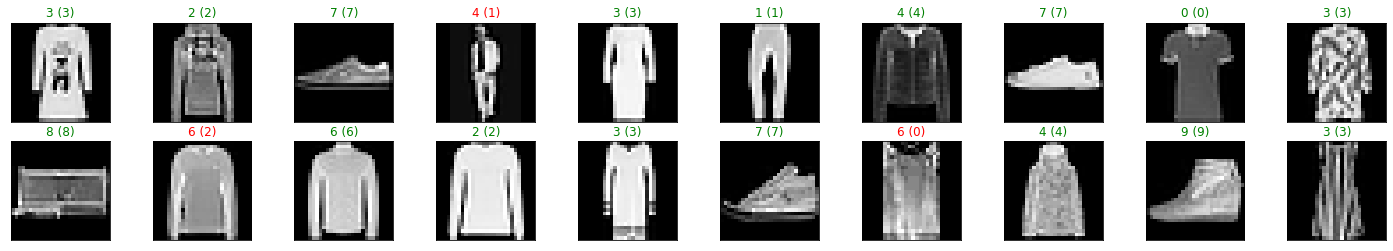

In [27]:
# check predictions by printing the output image for random test inputs.
dataiter = iter(testloader)
images, labels = dataiter.next()
output = model(images)
_, preds = torch.max(output, 1)
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))